In [56]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [57]:
# 加载预训练的MobileNetV2模型，并且不包括顶层分类器
mobile_model = MobileNetV2(weights='imagenet', alpha=1.0, include_top=False, input_shape=(224, 224, 3))

# 冻结 MobileNetV2 中的所有层，使其权重不可训练
for layer in mobile_model.layers:
    layer.trainable = False
    
# 创建一个新的顶层分类器
mb_model = Sequential()
mb_model.add(mobile_model)
mb_model.add(Conv2D(filters=64, kernel_size=2, strides=2, padding='same', activation='relu'))
mb_model.add(Dropout(0.4))
mb_model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
mb_model.add(Dropout(0.4))
mb_model.add(MaxPooling2D(pool_size=2, padding='same'))
mb_model.add(Flatten())
mb_model.add(Dense(32, activation='relu'))
mb_model.add(Dropout(0.4))
mb_model.add(Dense(2, activation='softmax')) 


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.
2024-06-10 01:14:15.889755: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-06-10 01:14:16.090413: W tensorflow/c/c_api.cc:304] Operation '{name:'block_15_project_BN/moving_mean/Assign' id:3919 op device:{requested: '', assigned: ''} def:{{{node block_15_project_BN/moving_mean/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](block_15_project_BN/moving_mean, block_15_project_BN/moving_mean/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [58]:
mb_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          327744    
                                                                 
 dropout_9 (Dropout)         (None, 4, 4, 64)          0         
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 dropout_10 (Dropout)        (None, 4, 4, 32)          0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                 

In [59]:
# 加载预训练的MobileNetV2模型，并且不包括顶层分类器
mobile_model = MobileNetV2(weights='imagenet', alpha=1.0, include_top=False, input_shape=(224, 224, 3))

# 冻结 MobileNetV2 中的所有层，使其权重不可训练
for layer in mobile_model.layers:
    layer.trainable = True
uni_mb_model = Sequential()
uni_mb_model.add(mobile_model)
uni_mb_model.add(Flatten())
uni_mb_model.add(Dense(2, activation='softmax')) 
uni_mb_model.summary()

2024-06-10 01:14:22.726900: W tensorflow/c/c_api.cc:304] Operation '{name:'block_5_expand_BN_1/moving_variance/Assign' id:9449 op device:{requested: '', assigned: ''} def:{{{node block_5_expand_BN_1/moving_variance/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](block_5_expand_BN_1/moving_variance, block_5_expand_BN_1/moving_variance/Initializer/ones)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_9 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2383426 (9.09 MB)
Trainable params: 2349314 (8.96 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [60]:
# 构建卷积神经网络模型
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=2, strides=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2, padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(2, activation='softmax'))
# cnn_model = Sequential([
#     Conv2D(filters=128, kernel_size=2, strides=2, padding='same', activation='relu', input_shape=(224, 224, 3)),
#     Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'),
#     Dropout(0.4),
#     Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
#     Dropout(0.4),
#     MaxPooling2D(pool_size=2, padding='same'),
#     Flatten(),
#     Dense(32, activation='relu'),
#     Dropout(0.4),  
#     Dense(2, activation='softmax')
# ])
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 112, 112, 32)      416       
                                                                 
 dropout_12 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 dropout_13 (Dropout)        (None, 112, 112, 64)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                      

In [61]:
# 加载预训练的MobileNetV2模型，并且不包括顶层分类器
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
# MobileNetV2(weights='imagenet', alpha=1.0, include_top=False, input_shape=(224, 224, 3))

# 冻结 MobileNetV2 中的所有层，使其权重不可训练
for layer in base_model.layers:
    layer.trainable = False
    
# 创建一个新的顶层分类器
vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(Conv2D(filters=64, kernel_size=2, strides=2, padding='same', activation='relu'))
vgg_model.add(Dropout(0.4))
vgg_model.add(Conv2D(filters=32, kernel_size=2, strides=2, activation='relu'))
vgg_model.add(Dropout(0.4))
vgg_model.add(MaxPooling2D(pool_size=2, padding='same',))
vgg_model.add(Flatten())
vgg_model.add(Dense(32, activation='relu'))
vgg_model.add(Dropout(0.4))
vgg_model.add(Dense(2, activation='softmax')) 

vgg_model.summary()

2024-06-10 01:14:26.600159: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_11/kernel/Assign' id:16389 op device:{requested: '', assigned: ''} def:{{{node dense_11/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_11/kernel, dense_11/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)          131136    
                                                                 
 dropout_15 (Dropout)        (None, 4, 4, 64)          0         
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 32)          8224      
                                                                 
 dropout_16 (Dropout)        (None, 2, 2, 32)          0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                      

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [63]:
# 编译模型
mb_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
uni_mb_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 设置模型保存路径和保存条件
checkpoint_path_mb = "best_model_fine_mobilenetV2_mb"
checkpoint_mb = ModelCheckpoint(checkpoint_path_mb, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# 设置模型保存路径和保存条件
checkpoint_path_cnn = "best_model_fine_mobilenetV2_cnn"
checkpoint_cnn = ModelCheckpoint(checkpoint_path_cnn, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# 设置模型保存路径和保存条件
checkpoint_path_vgg = "best_model_fine_mobilenetV2_vgg"
checkpoint_vgg = ModelCheckpoint(checkpoint_path_vgg, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# 设置模型保存路径和保存条件
checkpoint_path_uni_mb = "best_model_fine_mobilenetV2_uni_mb"
checkpoint_uni_mb = ModelCheckpoint(checkpoint_path_uni_mb, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')



In [64]:
# 准备数据
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './datav2/tdata',  # 替换为你的训练数据目录
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    './datav2/vdata',  # 替换为你的验证数据目录
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical')

Found 507 images belonging to 2 classes.
Found 119 images belonging to 2 classes.


In [9]:
# 训练模型
# uni_mb_history = uni_mb_model.fit(train_generator,
#           steps_per_epoch=len(train_generator),
#           epochs=50,
#           validation_data=validation_generator,
#           validation_steps=len(validation_generator),
#           callbacks=[checkpoint_uni_mb])

Epoch 1/50
127/127 [==============================] - ETA: 0s - loss: 4.6838 - accuracy: 0.5621
Epoch 1: val_accuracy improved from -inf to 0.65546, saving model to best_model_fine_mobilenetV2_uni_mb


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_uni_mb/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_uni_mb/assets


127/127 [==============================] - 53s 377ms/step - loss: 4.6838 - accuracy: 0.5621 - val_loss: 57.1916 - val_accuracy: 0.6555
Epoch 2/50
127/127 [==============================] - ETA: 0s - loss: 5.9576 - accuracy: 0.5819
Epoch 2: val_accuracy did not improve from 0.65546
127/127 [==============================] - 27s 208ms/step - loss: 5.9576 - accuracy: 0.5819 - val_loss: 46.8616 - val_accuracy: 0.6555
Epoch 3/50
127/127 [==============================] - ETA: 0s - loss: 3.7814 - accuracy: 0.5838
Epoch 3: val_accuracy did not improve from 0.65546
127/127 [==============================] - 26s 203ms/step - loss: 3.7814 - accuracy: 0.5838 - val_loss: 55.5436 - val_accuracy: 0.6555
Epoch 4/50
127/127 [==============================] - ETA: 0s - loss: 6.3942 - accuracy: 0.5838
Epoch 4: val_accuracy did not improve from 0.65546
127/127 [==============================] - 26s 202ms/step - loss: 6.3942 - accuracy: 0.5838 - val_loss: 42.0335 - val_accuracy: 0.6555
Epoch 5/50
127/127 

INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_uni_mb/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_uni_mb/assets


127/127 [==============================] - 45s 354ms/step - loss: 1.6400 - accuracy: 0.6055 - val_loss: 5.8584 - val_accuracy: 0.6639
Epoch 14/50
127/127 [==============================] - ETA: 0s - loss: 1.7939 - accuracy: 0.6114
Epoch 14: val_accuracy did not improve from 0.66387
127/127 [==============================] - 26s 202ms/step - loss: 1.7939 - accuracy: 0.6114 - val_loss: 44.5178 - val_accuracy: 0.6555
Epoch 15/50
127/127 [==============================] - ETA: 0s - loss: 1.6780 - accuracy: 0.5996
Epoch 15: val_accuracy did not improve from 0.66387
127/127 [==============================] - 26s 202ms/step - loss: 1.6780 - accuracy: 0.5996 - val_loss: 22.2918 - val_accuracy: 0.6639
Epoch 16/50
127/127 [==============================] - ETA: 0s - loss: 1.3750 - accuracy: 0.6193
Epoch 16: val_accuracy did not improve from 0.66387
127/127 [==============================] - 26s 203ms/step - loss: 1.3750 - accuracy: 0.6193 - val_loss: 7.5281 - val_accuracy: 0.4790
Epoch 17/50
127

INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_uni_mb/assets


127/127 [==============================] - 46s 367ms/step - loss: 1.5148 - accuracy: 0.5976 - val_loss: 5.5067 - val_accuracy: 0.6723
Epoch 19/50
127/127 [==============================] - ETA: 0s - loss: 1.9117 - accuracy: 0.5917
Epoch 19: val_accuracy did not improve from 0.67227
127/127 [==============================] - 26s 201ms/step - loss: 1.9117 - accuracy: 0.5917 - val_loss: 0.8787 - val_accuracy: 0.6555
Epoch 20/50
127/127 [==============================] - ETA: 0s - loss: 1.5120 - accuracy: 0.5996
Epoch 20: val_accuracy did not improve from 0.67227
127/127 [==============================] - 26s 203ms/step - loss: 1.5120 - accuracy: 0.5996 - val_loss: 0.7760 - val_accuracy: 0.6471
Epoch 21/50
127/127 [==============================] - ETA: 0s - loss: 1.4034 - accuracy: 0.6174
Epoch 21: val_accuracy did not improve from 0.67227
127/127 [==============================] - 26s 205ms/step - loss: 1.4034 - accuracy: 0.6174 - val_loss: 15.6538 - val_accuracy: 0.6639
Epoch 22/50
127/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


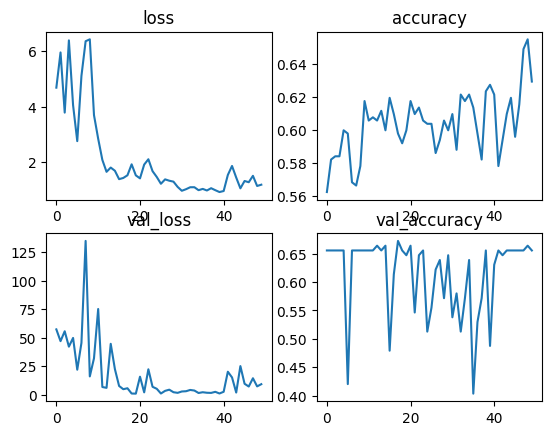

In [10]:
import matplotlib.pyplot as plt
import json


history = uni_mb_history
# # 将字典数据保存到JSON文件中
with open(checkpoint_path_uni_mb+"/history.json", "w", encoding="utf-8") as f:
    json.dump(history.history, f, ensure_ascii=False, indent=4)
print(history.history.keys())  # 查看字典的键
loss = history.history['loss']  # 测试集损失
acc = history.history['accuracy']  # 测试集准确率
val_loss = history.history['val_loss']  # 验证集损失
val_acc = history.history['val_accuracy']  # 验证集准确率

# 可视化，定义2*2的画布
plt.figure()
plt.subplot(221)
plt.plot(loss)
plt.title('loss')
plt.subplot(222)
plt.plot(acc)
plt.title('accuracy')
plt.subplot(223)
plt.plot(val_loss)
plt.title('val_loss')
plt.subplot(224)
plt.plot(val_acc)
plt.title('val_accuracy')
plt.show()

In [8]:
# 训练模型
mb_history = mb_model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=50,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_mb])


Epoch 1/50
127/127 [==============================] - ETA: 0s - loss: 1.2419 - accuracy: 0.5602
Epoch 1: val_accuracy improved from -inf to 0.61345, saving model to best_model_fine_mobilenetV2_mb


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


127/127 [==============================] - 34s 248ms/step - loss: 1.2419 - accuracy: 0.5602 - val_loss: 0.6690 - val_accuracy: 0.6134
Epoch 2/50
127/127 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.6174
Epoch 2: val_accuracy improved from 0.61345 to 0.68908, saving model to best_model_fine_mobilenetV2_mb


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


127/127 [==============================] - 30s 240ms/step - loss: 0.6852 - accuracy: 0.6174 - val_loss: 0.5825 - val_accuracy: 0.6891
Epoch 3/50
127/127 [==============================] - ETA: 0s - loss: 0.6006 - accuracy: 0.6686
Epoch 3: val_accuracy improved from 0.68908 to 0.78992, saving model to best_model_fine_mobilenetV2_mb
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


127/127 [==============================] - 31s 244ms/step - loss: 0.6006 - accuracy: 0.6686 - val_loss: 0.5535 - val_accuracy: 0.7899
Epoch 4/50
127/127 [==============================] - ETA: 0s - loss: 0.5571 - accuracy: 0.7120
Epoch 4: val_accuracy did not improve from 0.78992
127/127 [==============================] - 13s 102ms/step - loss: 0.5571 - accuracy: 0.7120 - val_loss: 0.4851 - val_accuracy: 0.7815
Epoch 5/50
127/127 [==============================] - ETA: 0s - loss: 0.5109 - accuracy: 0.7594
Epoch 5: val_accuracy improved from 0.78992 to 0.82353, saving model to best_model_fine_mobilenetV2_mb
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


127/127 [==============================] - 30s 239ms/step - loss: 0.5109 - accuracy: 0.7594 - val_loss: 0.4520 - val_accuracy: 0.8235
Epoch 6/50
127/127 [==============================] - ETA: 0s - loss: 0.4838 - accuracy: 0.7988
Epoch 6: val_accuracy did not improve from 0.82353
127/127 [==============================] - 13s 101ms/step - loss: 0.4838 - accuracy: 0.7988 - val_loss: 0.5533 - val_accuracy: 0.7479
Epoch 7/50
127/127 [==============================] - ETA: 0s - loss: 0.4681 - accuracy: 0.7949
Epoch 7: val_accuracy did not improve from 0.82353
127/127 [==============================] - 13s 104ms/step - loss: 0.4681 - accuracy: 0.7949 - val_loss: 0.4399 - val_accuracy: 0.8151
Epoch 8/50
127/127 [==============================] - ETA: 0s - loss: 0.3690 - accuracy: 0.8264
Epoch 8: val_accuracy improved from 0.82353 to 0.83193, saving model to best_model_fine_mobilenetV2_mb
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


127/127 [==============================] - 31s 242ms/step - loss: 0.3690 - accuracy: 0.8264 - val_loss: 0.3931 - val_accuracy: 0.8319
Epoch 9/50
127/127 [==============================] - ETA: 0s - loss: 0.3475 - accuracy: 0.8521
Epoch 9: val_accuracy improved from 0.83193 to 0.87395, saving model to best_model_fine_mobilenetV2_mb
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


127/127 [==============================] - 30s 238ms/step - loss: 0.3475 - accuracy: 0.8521 - val_loss: 0.3544 - val_accuracy: 0.8739
Epoch 10/50
127/127 [==============================] - ETA: 0s - loss: 0.2861 - accuracy: 0.8836
Epoch 10: val_accuracy did not improve from 0.87395
127/127 [==============================] - 14s 107ms/step - loss: 0.2861 - accuracy: 0.8836 - val_loss: 0.3813 - val_accuracy: 0.8235
Epoch 11/50
127/127 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.8402
Epoch 11: val_accuracy did not improve from 0.87395
127/127 [==============================] - 14s 107ms/step - loss: 0.3626 - accuracy: 0.8402 - val_loss: 0.3519 - val_accuracy: 0.8235
Epoch 12/50
127/127 [==============================] - ETA: 0s - loss: 0.2434 - accuracy: 0.8856
Epoch 12: val_accuracy did not improve from 0.87395
127/127 [==============================] - 13s 105ms/step - loss: 0.2434 - accuracy: 0.8856 - val_loss: 0.3378 - val_accuracy: 0.8487
Epoch 13/50
127/1

INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


127/127 [==============================] - 31s 241ms/step - loss: 0.2046 - accuracy: 0.9290 - val_loss: 0.3513 - val_accuracy: 0.9076
Epoch 14/50
127/127 [==============================] - ETA: 0s - loss: 0.2033 - accuracy: 0.9369
Epoch 14: val_accuracy did not improve from 0.90756
127/127 [==============================] - 14s 108ms/step - loss: 0.2033 - accuracy: 0.9369 - val_loss: 0.3745 - val_accuracy: 0.8739
Epoch 15/50
127/127 [==============================] - ETA: 0s - loss: 0.2041 - accuracy: 0.9310
Epoch 15: val_accuracy improved from 0.90756 to 0.92437, saving model to best_model_fine_mobilenetV2_mb
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


127/127 [==============================] - 31s 243ms/step - loss: 0.2041 - accuracy: 0.9310 - val_loss: 0.4129 - val_accuracy: 0.9244
Epoch 16/50
127/127 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9645
Epoch 16: val_accuracy did not improve from 0.92437
127/127 [==============================] - 14s 109ms/step - loss: 0.1096 - accuracy: 0.9645 - val_loss: 0.3055 - val_accuracy: 0.8908
Epoch 17/50
127/127 [==============================] - ETA: 0s - loss: 0.1150 - accuracy: 0.9665
Epoch 17: val_accuracy did not improve from 0.92437
127/127 [==============================] - 14s 108ms/step - loss: 0.1150 - accuracy: 0.9665 - val_loss: 0.2896 - val_accuracy: 0.8655
Epoch 18/50
127/127 [==============================] - ETA: 0s - loss: 0.1253 - accuracy: 0.9527
Epoch 18: val_accuracy did not improve from 0.92437
127/127 [==============================] - 14s 107ms/step - loss: 0.1253 - accuracy: 0.9527 - val_loss: 0.3616 - val_accuracy: 0.8739
Epoch 19/50
127/1

INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_mb/assets


127/127 [==============================] - 31s 244ms/step - loss: 0.0623 - accuracy: 0.9822 - val_loss: 0.3275 - val_accuracy: 0.9328
Epoch 42/50
127/127 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9941
Epoch 42: val_accuracy did not improve from 0.93277
127/127 [==============================] - 14s 110ms/step - loss: 0.0235 - accuracy: 0.9941 - val_loss: 0.4033 - val_accuracy: 0.8824
Epoch 43/50
127/127 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9941
Epoch 43: val_accuracy did not improve from 0.93277
127/127 [==============================] - 14s 109ms/step - loss: 0.0257 - accuracy: 0.9941 - val_loss: 0.4652 - val_accuracy: 0.8992
Epoch 44/50
127/127 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9882
Epoch 44: val_accuracy did not improve from 0.93277
127/127 [==============================] - 13s 99ms/step - loss: 0.0572 - accuracy: 0.9882 - val_loss: 0.6161 - val_accuracy: 0.8487
Epoch 45/50
127/12

In [2]:
import matplotlib.pyplot as plt
import json


history = mb_history
# # 将字典数据保存到JSON文件中
with open(checkpoint_path_mb+"/history.json", "w", encoding="utf-8") as f:
    json.dump(history.history, f, ensure_ascii=False, indent=4)
print(history.history.keys())  # 查看字典的键
loss = history.history['loss']  # 测试集损失
acc = history.history['accuracy']  # 测试集准确率
val_loss = history.history['val_loss']  # 验证集损失
val_acc = history.history['val_accuracy']  # 验证集准确率

# 可视化，定义2*2的画布
plt.figure()
plt.subplot(221)
plt.plot(loss)
plt.title('loss')
plt.subplot(222)
plt.plot(acc)
plt.title('accuracy')
plt.subplot(223)
plt.plot(val_loss)
plt.title('val_loss')
plt.subplot(224)
plt.plot(val_acc)
plt.title('val_accuracy')
plt.show()

NameError: name 'mb_history' is not defined

In [11]:

cnn_history = cnn_model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=50,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_cnn])



Epoch 1/50
127/127 [==============================] - ETA: 0s - loss: 0.8098 - accuracy: 0.6016
Epoch 1: val_accuracy improved from -inf to 0.65546, saving model to best_model_fine_mobilenetV2_cnn
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_cnn/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_cnn/assets


127/127 [==============================] - 17s 128ms/step - loss: 0.8098 - accuracy: 0.6016 - val_loss: 0.6445 - val_accuracy: 0.6555
Epoch 2/50
127/127 [==============================] - ETA: 0s - loss: 0.6572 - accuracy: 0.6391
Epoch 2: val_accuracy did not improve from 0.65546
127/127 [==============================] - 15s 117ms/step - loss: 0.6572 - accuracy: 0.6391 - val_loss: 0.6675 - val_accuracy: 0.6555
Epoch 3/50
127/127 [==============================] - ETA: 0s - loss: 0.6650 - accuracy: 0.6391
Epoch 3: val_accuracy did not improve from 0.65546
127/127 [==============================] - 15s 122ms/step - loss: 0.6650 - accuracy: 0.6391 - val_loss: 0.6751 - val_accuracy: 0.6555
Epoch 4/50
127/127 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.6391
Epoch 4: val_accuracy did not improve from 0.65546
127/127 [==============================] - 15s 119ms/step - loss: 0.6668 - accuracy: 0.6391 - val_loss: 0.6552 - val_accuracy: 0.6555
Epoch 5/50
127/127 [===

INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_cnn/assets


127/127 [==============================] - 16s 129ms/step - loss: 0.3840 - accuracy: 0.7377 - val_loss: 1.1162 - val_accuracy: 0.6639
Epoch 16/50
127/127 [==============================] - ETA: 0s - loss: 0.3501 - accuracy: 0.9034
Epoch 16: val_accuracy improved from 0.66387 to 0.69748, saving model to best_model_fine_mobilenetV2_cnn
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_cnn/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_cnn/assets


127/127 [==============================] - 16s 126ms/step - loss: 0.3501 - accuracy: 0.9034 - val_loss: 0.9283 - val_accuracy: 0.6975
Epoch 17/50
127/127 [==============================] - ETA: 0s - loss: 0.2974 - accuracy: 0.9172
Epoch 17: val_accuracy improved from 0.69748 to 0.71429, saving model to best_model_fine_mobilenetV2_cnn
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_cnn/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_cnn/assets


127/127 [==============================] - 16s 125ms/step - loss: 0.2974 - accuracy: 0.9172 - val_loss: 1.2222 - val_accuracy: 0.7143
Epoch 18/50
127/127 [==============================] - ETA: 0s - loss: 0.2918 - accuracy: 0.9112
Epoch 18: val_accuracy did not improve from 0.71429
127/127 [==============================] - 15s 116ms/step - loss: 0.2918 - accuracy: 0.9112 - val_loss: 1.2504 - val_accuracy: 0.7059
Epoch 19/50
127/127 [==============================] - ETA: 0s - loss: 0.1879 - accuracy: 0.9428
Epoch 19: val_accuracy did not improve from 0.71429
127/127 [==============================] - 15s 117ms/step - loss: 0.1879 - accuracy: 0.9428 - val_loss: 1.3872 - val_accuracy: 0.5882
Epoch 20/50
127/127 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9408
Epoch 20: val_accuracy did not improve from 0.71429
127/127 [==============================] - 15s 115ms/step - loss: 0.1788 - accuracy: 0.9408 - val_loss: 1.5849 - val_accuracy: 0.6639
Epoch 21/50
127/1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


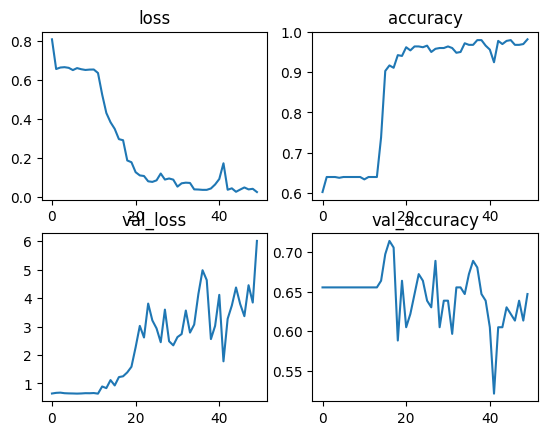

In [12]:
import matplotlib.pyplot as plt
history = cnn_history
# # 将字典数据保存到JSON文件中
with open(checkpoint_path_cnn+"/history.json", "w", encoding="utf-8") as f:
    json.dump(history.history, f, ensure_ascii=False, indent=4)
print(history.history.keys())  # 查看字典的键
loss = history.history['loss']  # 测试集损失
acc = history.history['accuracy']  # 测试集准确率
val_loss = history.history['val_loss']  # 验证集损失
val_acc = history.history['val_accuracy']  # 验证集准确率

# 可视化，定义2*2的画布
plt.figure()
plt.subplot(221)
plt.plot(loss)
plt.title('loss')
plt.subplot(222)
plt.plot(acc)
plt.title('accuracy')
plt.subplot(223)
plt.plot(val_loss)
plt.title('val_loss')
plt.subplot(224)
plt.plot(val_acc)
plt.title('val_accuracy')
plt.show()

In [10]:
vgg_history = vgg_model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=50,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_vgg])

Epoch 1/50
127/127 [==============================] - ETA: 0s - loss: 0.7510 - accuracy: 0.5838
Epoch 1: val_accuracy improved from -inf to 0.66387, saving model to best_model_fine_mobilenetV2_vgg
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


127/127 [==============================] - 30s 225ms/step - loss: 0.7510 - accuracy: 0.5838 - val_loss: 0.6667 - val_accuracy: 0.6639
Epoch 2/50
127/127 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.5957
Epoch 2: val_accuracy did not improve from 0.66387
127/127 [==============================] - 25s 195ms/step - loss: 0.6758 - accuracy: 0.5957 - val_loss: 0.6505 - val_accuracy: 0.6555
Epoch 3/50
127/127 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.6351
Epoch 3: val_accuracy did not improve from 0.66387
127/127 [==============================] - 25s 194ms/step - loss: 0.6551 - accuracy: 0.6351 - val_loss: 0.6497 - val_accuracy: 0.6555
Epoch 4/50
127/127 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.6272
Epoch 4: val_accuracy did not improve from 0.66387
127/127 [==============================] - 24s 192ms/step - loss: 0.6765 - accuracy: 0.6272 - val_loss: 0.6401 - val_accuracy: 0.6555
Epoch 5/50
127/127 [===

INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


127/127 [==============================] - 27s 212ms/step - loss: 0.6002 - accuracy: 0.6667 - val_loss: 0.5815 - val_accuracy: 0.6975
Epoch 8/50
127/127 [==============================] - ETA: 0s - loss: 0.5872 - accuracy: 0.6469
Epoch 8: val_accuracy did not improve from 0.69748
127/127 [==============================] - 25s 194ms/step - loss: 0.5872 - accuracy: 0.6469 - val_loss: 0.5382 - val_accuracy: 0.6639
Epoch 9/50
127/127 [==============================] - ETA: 0s - loss: 0.5301 - accuracy: 0.6982
Epoch 9: val_accuracy improved from 0.69748 to 0.78992, saving model to best_model_fine_mobilenetV2_vgg
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


127/127 [==============================] - 26s 207ms/step - loss: 0.5301 - accuracy: 0.6982 - val_loss: 0.5774 - val_accuracy: 0.7899
Epoch 10/50
127/127 [==============================] - ETA: 0s - loss: 0.5087 - accuracy: 0.7909
Epoch 10: val_accuracy did not improve from 0.78992
127/127 [==============================] - 24s 192ms/step - loss: 0.5087 - accuracy: 0.7909 - val_loss: 0.4836 - val_accuracy: 0.7647
Epoch 11/50
127/127 [==============================] - ETA: 0s - loss: 0.4983 - accuracy: 0.7771
Epoch 11: val_accuracy did not improve from 0.78992
127/127 [==============================] - 24s 190ms/step - loss: 0.4983 - accuracy: 0.7771 - val_loss: 0.5102 - val_accuracy: 0.7899
Epoch 12/50
127/127 [==============================] - ETA: 0s - loss: 0.4885 - accuracy: 0.7613
Epoch 12: val_accuracy improved from 0.78992 to 0.81513, saving model to best_model_fine_mobilenetV2_vgg
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


127/127 [==============================] - 27s 214ms/step - loss: 0.4885 - accuracy: 0.7613 - val_loss: 0.4551 - val_accuracy: 0.8151
Epoch 13/50
127/127 [==============================] - ETA: 0s - loss: 0.4846 - accuracy: 0.7673
Epoch 13: val_accuracy did not improve from 0.81513
127/127 [==============================] - 25s 194ms/step - loss: 0.4846 - accuracy: 0.7673 - val_loss: 0.4618 - val_accuracy: 0.8067
Epoch 14/50
127/127 [==============================] - ETA: 0s - loss: 0.4802 - accuracy: 0.7673
Epoch 14: val_accuracy did not improve from 0.81513
127/127 [==============================] - 24s 192ms/step - loss: 0.4802 - accuracy: 0.7673 - val_loss: 0.5366 - val_accuracy: 0.7227
Epoch 15/50
127/127 [==============================] - ETA: 0s - loss: 0.4810 - accuracy: 0.7890
Epoch 15: val_accuracy did not improve from 0.81513
127/127 [==============================] - 24s 189ms/step - loss: 0.4810 - accuracy: 0.7890 - val_loss: 0.4249 - val_accuracy: 0.8151
Epoch 16/50
127/1

INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


127/127 [==============================] - 27s 209ms/step - loss: 0.3983 - accuracy: 0.8462 - val_loss: 0.4039 - val_accuracy: 0.8235
Epoch 17/50
127/127 [==============================] - ETA: 0s - loss: 0.4187 - accuracy: 0.8402
Epoch 17: val_accuracy improved from 0.82353 to 0.86555, saving model to best_model_fine_mobilenetV2_vgg
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


127/127 [==============================] - 27s 215ms/step - loss: 0.4187 - accuracy: 0.8402 - val_loss: 0.3914 - val_accuracy: 0.8655
Epoch 18/50
127/127 [==============================] - ETA: 0s - loss: 0.3974 - accuracy: 0.8166
Epoch 18: val_accuracy did not improve from 0.86555
127/127 [==============================] - 25s 193ms/step - loss: 0.3974 - accuracy: 0.8166 - val_loss: 0.3839 - val_accuracy: 0.8403
Epoch 19/50
127/127 [==============================] - ETA: 0s - loss: 0.3693 - accuracy: 0.8402
Epoch 19: val_accuracy did not improve from 0.86555
127/127 [==============================] - 25s 194ms/step - loss: 0.3693 - accuracy: 0.8402 - val_loss: 0.4100 - val_accuracy: 0.7899
Epoch 20/50
127/127 [==============================] - ETA: 0s - loss: 0.4041 - accuracy: 0.8087
Epoch 20: val_accuracy did not improve from 0.86555
127/127 [==============================] - 25s 193ms/step - loss: 0.4041 - accuracy: 0.8087 - val_loss: 0.3802 - val_accuracy: 0.8403
Epoch 21/50
127/1

INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_vgg/assets


127/127 [==============================] - 26s 208ms/step - loss: 0.1855 - accuracy: 0.9369 - val_loss: 0.3927 - val_accuracy: 0.8824
Epoch 40/50
127/127 [==============================] - ETA: 0s - loss: 0.1837 - accuracy: 0.9270
Epoch 40: val_accuracy did not improve from 0.88235
127/127 [==============================] - 25s 194ms/step - loss: 0.1837 - accuracy: 0.9270 - val_loss: 0.4315 - val_accuracy: 0.8571
Epoch 41/50
127/127 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.9211
Epoch 41: val_accuracy did not improve from 0.88235
127/127 [==============================] - 25s 194ms/step - loss: 0.2209 - accuracy: 0.9211 - val_loss: 0.4738 - val_accuracy: 0.8571
Epoch 42/50
127/127 [==============================] - ETA: 0s - loss: 0.1835 - accuracy: 0.9290
Epoch 42: val_accuracy did not improve from 0.88235
127/127 [==============================] - 24s 188ms/step - loss: 0.1835 - accuracy: 0.9290 - val_loss: 0.4086 - val_accuracy: 0.8655
Epoch 43/50
127/1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


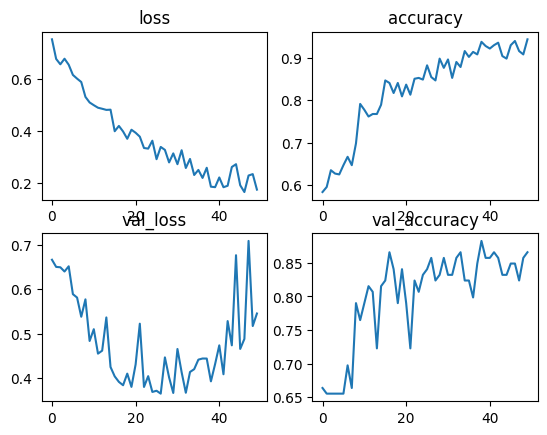

In [12]:
import matplotlib.pyplot as plt
history = vgg_history
# # 将字典数据保存到JSON文件中
with open(checkpoint_path_vgg+"/history.json", "w", encoding="utf-8") as f:
    json.dump(history.history, f, ensure_ascii=False, indent=4)
print(history.history.keys())  # 查看字典的键
loss = history.history['loss']  # 测试集损失
acc = history.history['accuracy']  # 测试集准确率
val_loss = history.history['val_loss']  # 验证集损失
val_acc = history.history['val_accuracy']  # 验证集准确率

# 可视化，定义2*2的画布
plt.figure()
plt.subplot(221)
plt.plot(loss)
plt.title('loss')
plt.subplot(222)
plt.plot(acc)
plt.title('accuracy')
plt.subplot(223)
plt.plot(val_loss)
plt.title('val_loss')
plt.subplot(224)
plt.plot(val_acc)
plt.title('val_accuracy')
plt.show()

In [32]:
from matplotlib import font_manager
mpl_fonts = set(f.name for f in font_manager.FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)


all font list get from matplotlib.font_manager:
	DejaVu Math TeX Gyre
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	STIXGeneral
	STIXNonUnicode
	STIXSizeFiveSym
	STIXSizeFourSym
	STIXSizeOneSym
	STIXSizeThreeSym
	STIXSizeTwoSym
	cmb10
	cmex10
	cmmi10
	cmr10
	cmss10
	cmsy10
	cmtt10


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


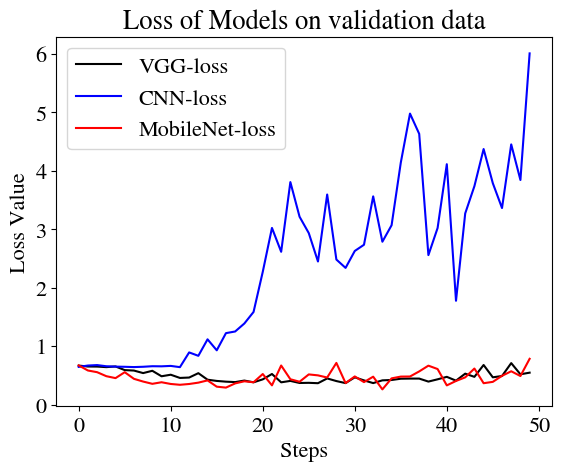

In [50]:
import json

# 读取JSON文件
with open(checkpoint_path_vgg+"/history.json", 'r', encoding='utf-8') as f:
    history = json.load(f)
print(history.keys())  # 查看字典的键
vgg_loss = history['loss']  # 测试集损失
vgg_acc = history['accuracy']  # 测试集准确率
vgg_val_loss = history['val_loss']  # 验证集损失
vgg_val_acc = history['val_accuracy']  # 验证集准确率

# 读取JSON文件
with open(checkpoint_path_cnn+"/history.json", 'r', encoding='utf-8') as f:
    history = json.load(f)
print(history.keys())  # 查看字典的键
cnn_loss = history['loss']  # 测试集损失
cnn_acc = history['accuracy']  # 测试集准确率
cnn_val_loss = history['val_loss']  # 验证集损失
cnn_val_acc = history['val_accuracy']  # 验证集准确率

# 读取JSON文件
with open(checkpoint_path_mb+"/history.json", 'r', encoding='utf-8') as f:
    history = json.load(f)
print(history.keys())  # 查看字典的键
mb_loss = history['loss']  # 测试集损失
mb_acc = history['accuracy']  # 测试集准确率
mb_val_loss = history['val_loss']  # 验证集损失
mb_val_acc = history['val_accuracy']  # 验证集准确率

# 读取JSON文件
with open(checkpoint_path_uni_mb+"/history.json", 'r', encoding='utf-8') as f:
    history = json.load(f)
print(history.keys())  # 查看字典的键
uni_loss = history['loss']  # 测试集损失
uni_acc = history['accuracy']  # 测试集准确率
uni_val_loss = history['val_loss']  # 验证集损失
uni_val_acc = history['val_accuracy']  # 验证集准确率

# 可视化
import matplotlib.pyplot as plt
# from matplotlib import font_manager
# my_font = font_manager.FontProperties(fname="./simhei.ttf")
# # 配置全局字体设置
# plt.rcParams['font.family'] = 'AR PL UKai CN'
plt.rcParams['font.size'] = 16
# # 指定字体路径
# font = font_manager.FontProperties(fname="./simhei.ttf")

# plt.rc("font",family="STIXGeneral") ###修改了这一行

x = range(0, len(uni_loss))
# 绘制第一条曲线，设置颜色为红色
plt.plot(x, vgg_val_loss, color='black', label='VGG-loss')

# 绘制第二条曲线，设置颜色为蓝色
plt.plot(x, cnn_val_loss, color='blue', label='CNN-loss')

# 绘制第二条曲线，设置颜色为蓝色
plt.plot(x, mb_val_loss, color='red', label='MobileNet-loss')

# 设置图表标题
plt.title('Loss of Models on validation data')

# 设置x轴名字
plt.xlabel('Steps')

# 设置y轴名字
plt.ylabel('Loss Value')

# 显示图例
plt.legend(loc="upper left")

#保存图片
plt.savefig('./evaImages/validation_Loss.jpg')

# 显示图表
plt.show()



In [77]:
from keras.models import load_model
cnn_model = load_model(checkpoint_path_cnn)
print(cnn_model.summary())
mb_model = load_model('./best_model_fine_mobilenetV2_paper')
print(mb_model.summary())
vgg_model = load_model(checkpoint_path_vgg)
print(vgg_model.summary())
# checkpoint_path_mb
# vgg_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
# print(vgg_model.summary())
# mb_model = MobileNetV2(weights='imagenet', alpha=1.0, include_top=False, input_shape=(224, 224, 3))
# print(mb_model.summary())

2024-06-10 01:30:55.674070: W tensorflow/c/c_api.cc:304] Operation '{name:'AssignVariableOp_1369' id:29312 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node AssignVariableOp_1369}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](count_30, Identity_823)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      416       
                                                                 
 dropout_3 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                      

2024-06-10 01:31:08.452480: W tensorflow/c/c_api.cc:304] Operation '{name:'AssignVariableOp_1580' id:31737 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node AssignVariableOp_1580}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](kernel_166, Identity_1034)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 64)          327744    
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 128)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 128)         0         
 D)                                                     

2024-06-10 01:31:13.762028: W tensorflow/c/c_api.cc:304] Operation '{name:'AssignVariableOp_1733' id:33785 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node AssignVariableOp_1733}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](bias_70, Identity_1187)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          131136    
                                                                 
 dropout_3 (Dropout)         (None, 4, 4, 64)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 32)          8224      
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 32)          0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                      

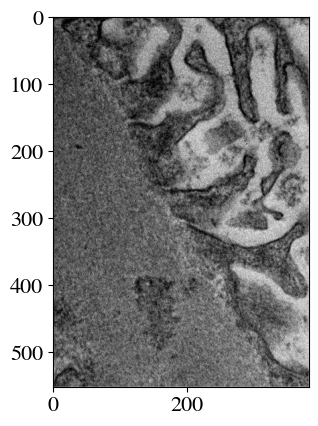

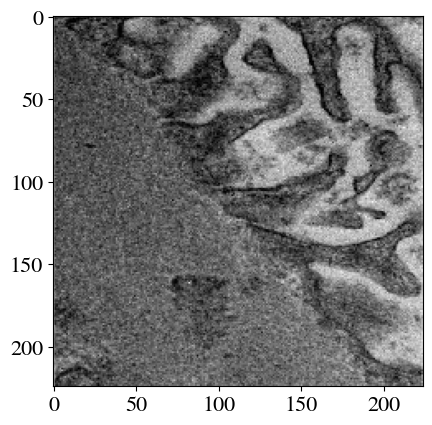

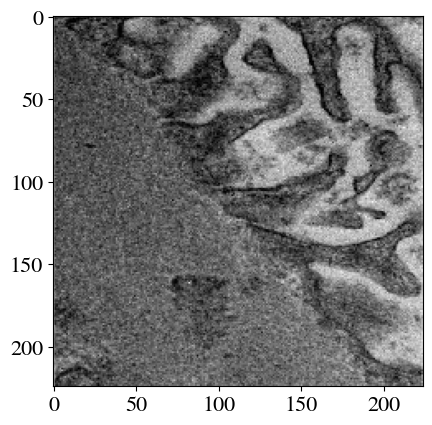

In [53]:

image_path = 'testdata/unmer9.jpg'
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread(image_path)
plt.imshow(img)
plt.show()

img = image.load_img(image_path, target_size=(224, 224,3))
plt.imshow(img)
plt.show()
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-06-10 01:15:15.183101: W tensorflow/c/c_api.cc:304] Operation '{name:'conv2d_2/Relu' id:17920 op device:{requested: '', assigned: ''} def:{{{node conv2d_2/Relu}} = Relu[T=DT_FLOAT, _has_manual_control_dependencies=true](conv2d_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


MemoryError: Unable to allocate 7.18 PiB for an array with shape (629407744, 1605632) and data type float64

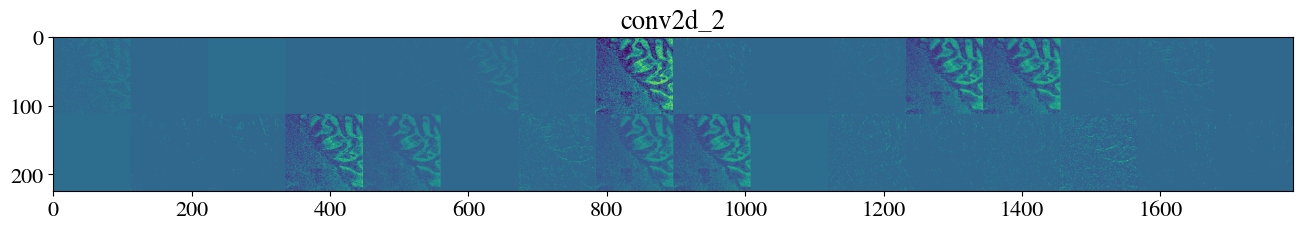

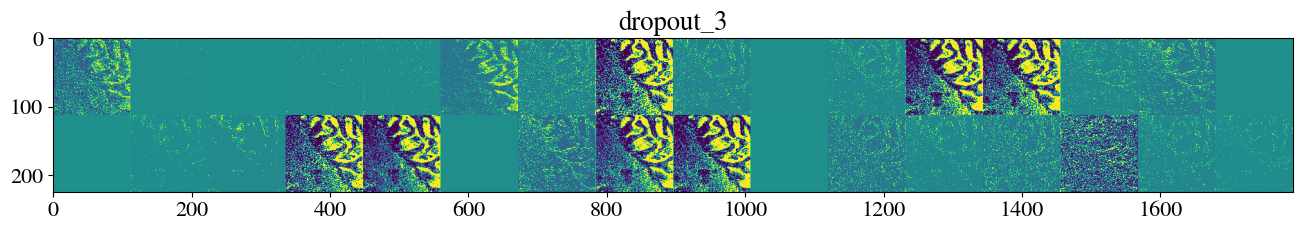

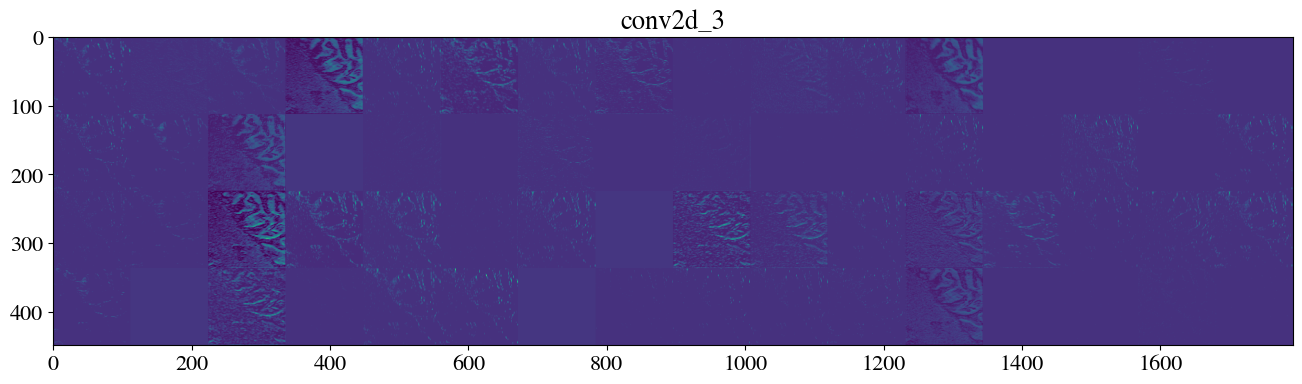

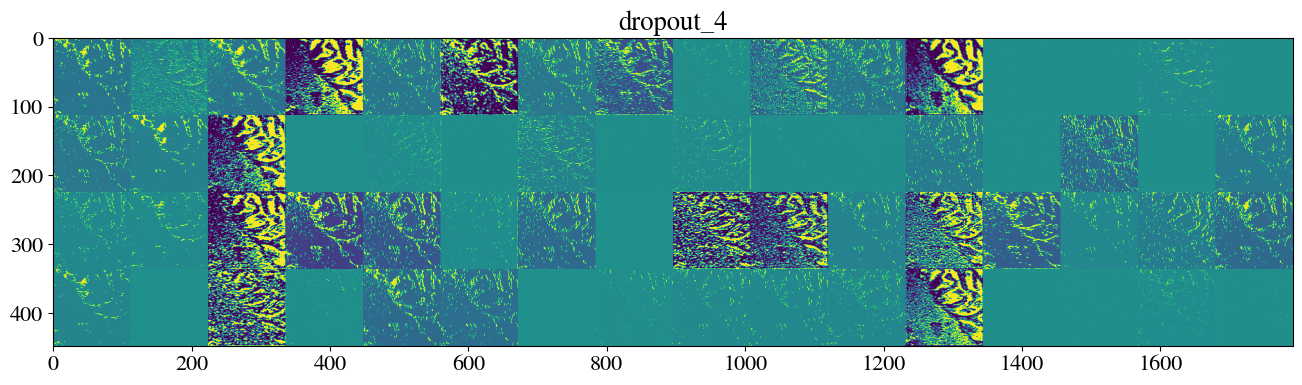

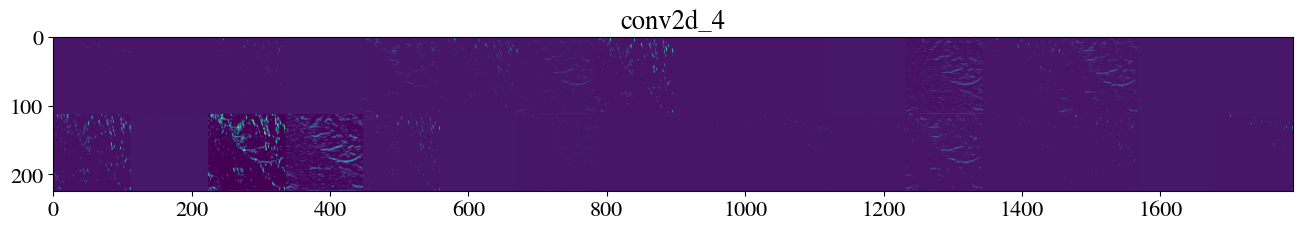

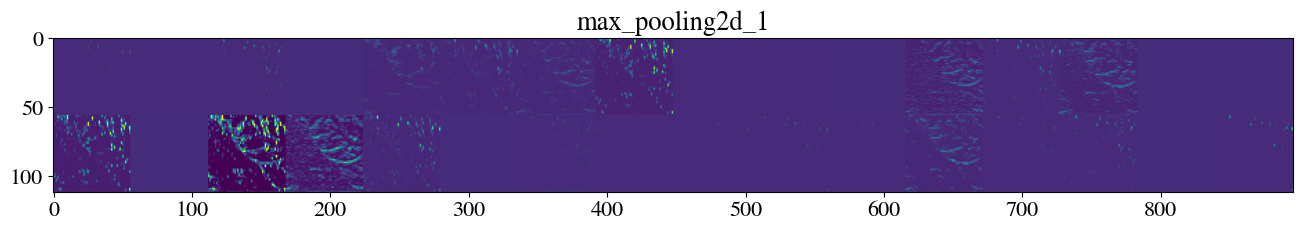

In [66]:
from keras import models

model = cnn_model
layer_outputs = [layer.output for layer in model.layers[:8]]
#返回8个Numpy数组组成的列表， 每个层激活对应一个 Numpy 数组
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
#以预测模式运行模型
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[4]
# for i in range(32):
#     plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
#     plt.show()

#将每个中间激活的所有通道可视化
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    #32
    size = layer_activation.shape[1]
    #148
    n_cols = n_features // images_per_row
    #2
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    #shape=(296.2368)
    for col in range(n_cols):
       for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            #channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size: (col + 1) * size, row * size: (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()

2024-06-05 01:18:21.107726: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 01:18:21.161781: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 01:18:21.162924: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 01:18:22.365883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-05 01:18:25.630169: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-06-05 01:18:25.693202: W tensorflow/c/c_api.cc:304] Operation '{name:'block4_conv2/kernel/Assign' id:210 op device:{requested: '', assigned: ''} def:{{{no

2
Predicted: [('n01751748', 'sea_snake', 0.17403454), ('n02321529', 'sea_cucumber', 0.120418295), ('n03223299', 'doormat', 0.10211019)]
pooled_grads: (64,)
(64,) (224, 224, 64)


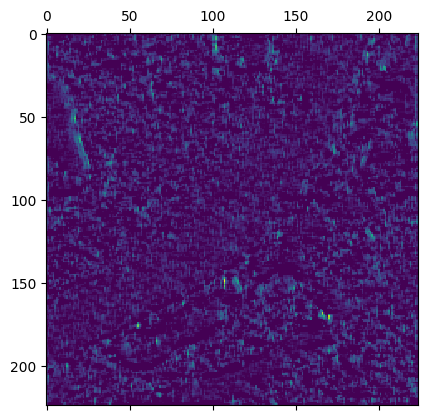

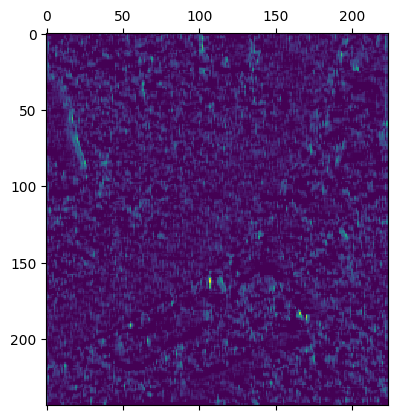

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# 特别注意，在之前的实验中，我们都把顶层的分类器丢弃掉了，include_top = False
model = VGG16(weights='imagenet')
# print("模型调取成功")


# model = cnn_model
# The local path to our target image
img_path = 'testdata/unmer0.jpg'


# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# 一转，`x` is a float32 Numpy array of shape (224, 224, 3)
x0 = image.img_to_array(img)

# 二扩，We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x1 = np.expand_dims(x0, axis=0)

# 三标，Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x1)

preds = model.predict(x)
print(len(preds.shape))
print('Predicted:', decode_predictions(preds, top=3)[0])
num = np.argmax(preds)#求最大的类别的索引

african_elephant_output = model.output[:, num]#获取索引为num的类的预测输出  shape: (batch_size,)
last_conv_layer = model.get_layer('block1_conv2')#获取最后一个卷积层激活输出 shape (batch_size, 14, 14, 512)
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]#求模型输出针对最后一个卷积层激活输出的梯度 shape(batch_size,14,14,512)

#梯度均值化，即求各通道平均值，平均数,即对每一层 14 x 14的矩阵求均值, (batch_size,14,14, 512) ----> (512,)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print('pooled_grads:',pooled_grads.shape)
#建立模型输出、最后一个卷积层激活输出、梯度均值三者之间的函数关系
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
# 以真实的数据作为输入，得到结果
pooled_grads_value, conv_layer_output_value = iterate([x])
print(pooled_grads_value.shape,conv_layer_output_value.shape)#(512,) (14, 14, 512)
##乘梯度
# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
#表征出最后卷积层激活输出各点对决策模型分类的重要程度。
for i in range(len(pooled_grads_value)):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1) # #shape:14*14
#Relu函数
heatmap = np.maximum(heatmap, 0)
#归一化处理
heatmap /= np.max(heatmap)  #shape:14*14

import matplotlib.pyplot as plt
plt.matshow(heatmap)
plt.show()


#读取原始图像
import cv2
test = cv2.imread(img_path)
#heatmap为[0,1]之间的浮点数，特别注意：cv2.resize(img, (x轴向长度，y轴向长度))
#调整热图尺寸，与原图保持一致，resize()

test = cv2.resize(test, (224, 244))
heatmap_test = cv2.resize(heatmap, (test.shape[1], test.shape[0]))
#可视化热力图
plt.matshow(heatmap_test)
plt.show()

#将heatmap数组转换为（0,255）之间的无符号的unit8数值
heatmap_test = np.uint8(255 * heatmap_test)
#将热力图转换为喷射效果
heatmap_test = cv2.applyColorMap(heatmap_test, cv2.COLORMAP_JET)
#将热力图与原始图像叠加， 0.5表示渲染强度, 有超出（0,255）范围的，如果需要可视化，则需要clip裁剪
superimposed_img_test = heatmap_test * 0.5 + test
superimposed_img_test=np.clip(superimposed_img_test,0,255)
print(np.max(superimposed_img_test),superimposed_img_test.shape)
superimposed_img_test=superimposed_img_test.astype(np.uint8) ##必须做，要不然会白屏
# 用OpenCV中imread输入照片后是一个数组对象，在进行一系列的对数组操作后数组已经变成了float类型，之后再对数组进行imshow时即出现上面的第二种情况。
# 倘若图像矩阵（double型）的矩阵元素不在0-1之间，那么imshow会把超过1的元素都显示为白色，即255。
# 其实也好理解，因为double的矩阵并不是归一化后的矩阵并不能保证元素范围一定就在0-1之间，所以就会出错。
cv2.imshow('1',superimposed_img_test)
cv2.waitKey(0)
# cv2.imwrite('a.jpg',superimposed_img_test)#写


Predicted: [[0.03863717 0.96136284]]


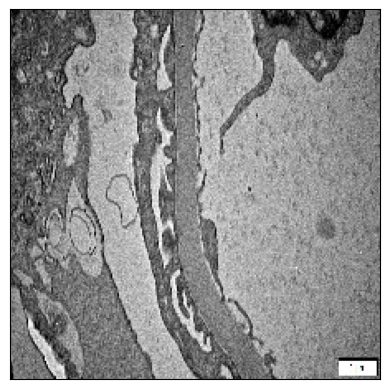

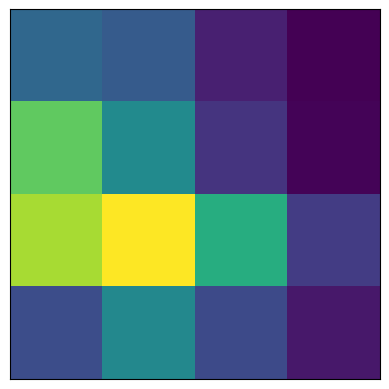

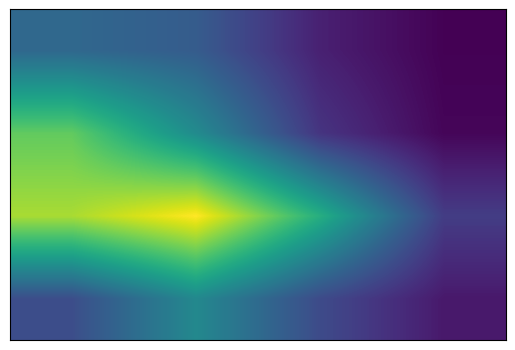

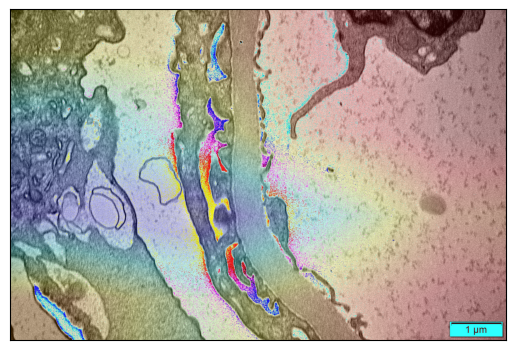

In [94]:
import tensorflow.compat.v1 as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt


# 载入模型
model = mb_model #load_model('./model/j.h5')

img_path = 'testdata/t4.jpg'
img = image.load_img(img_path,target_size=(224,224,3))
# 转化为形状为 (224, 224, 3) 的float32 格式的 Numpy 数组
x = image.img_to_array(img)
# 添加一个维度，将数组转换为(1, 224, 224, 3) 形状的批量
x = np.expand_dims(x,axis = 0)
preds = model.predict(x)
print('Predicted:',preds)
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.savefig('./evaImages/oriImage.jpg')
plt.show()

# 使用 Grad-CAM 算法
#预测向量中的cat元素
cat_output = model.output[:, 1]

#得到指定层的输出特征图，这是model最后一个卷积层
last_conv_layer = model.get_layer('conv2d')

# 得到cat在conv2d_4输出特征图的梯度
grads = K.gradients(cat_output,last_conv_layer.output)[0]

#（64，）的向量，每个元素是特征图通道的梯度平均大小
# K.mean()在给定轴上求张量元素之均值 -> pooled_grads的shape变成了(64, )
pooled_grads = K.mean(grads, axis=(0, 1, 2))

#访问pooled_grads：对于给定的样本图像，pooled_grads和max_pooling2d_2层的输出特征图
# K.function(input,output)，这里的input是输入至神经网络的图像，output是梯度平均大小（shape是64,_）和最后一个卷积层的输出（shape是10x10x64）
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

# 将特征图数组中的每个通道*这个通道对“cat”类别的重要程度。
for i in range(32):
     conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

#得到特征图的逐个通道平均值即类激活热力图    
heatmap = np.mean(conv_layer_output_value, axis=-1)

#绘制热力图
# import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.xticks([])
plt.yticks([])
plt.imshow(heatmap)
plt.savefig('./evaImages/heatMap1.jpg')
plt.show()


# 最后，我们可以用 OpenCV 来生成一张图像，将原始图像叠加在刚刚得到的热力图上
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
plt.xticks([])
plt.yticks([])
plt.imshow(heatmap)
plt.savefig('./evaImages/heatMap2.jpg')
plt.show()
# 将热力图应用于原始图像
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 这里的 0.4 是热力图强度因子
superimposed_img = heatmap * 0.2 + img
# cv2.imwrite('./evaImages/coverMap.jpg', superimposed_img)
plt.xticks([])
plt.yticks([])
plt.imshow(np.uint8(superimposed_img))
plt.savefig('./evaImages/coverMap.jpg')
plt.show()

In [ ]:
import tensorflow.compat.v1 as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

# 载入模型
model = cnn_model #load_model('./model/j.h5')

img_path = 'testdata/mer1.jpg'
img = image.load_img(img_path,target_size=(224,224,3))
# 转化为形状为 (224, 224, 3) 的float32 格式的 Numpy 数组
x = image.img_to_array(img)
# 添加一个维度，将数组转换为(1, 224, 224, 3) 形状的批量
x = np.expand_dims(x,axis = 0)
preds = model.predict(x)
print('Predicted:',preds)
plt.imshow(img)
plt.show()

# 使用 Grad-CAM 算法
#预测向量中的cat元素
cat_output = model.output[:, 1]

#得到指定层的输出特征图，这是model最后一个卷积层
last_conv_layer = model.get_layer('conv2d_4')

# 得到cat在conv2d_4输出特征图的梯度
grads = K.gradients(cat_output,last_conv_layer.output)[0]

#（64，）的向量，每个元素是特征图通道的梯度平均大小
# K.mean()在给定轴上求张量元素之均值 -> pooled_grads的shape变成了(64, )
pooled_grads = K.mean(grads, axis=(0, 1, 2))

#访问pooled_grads：对于给定的样本图像，pooled_grads和max_pooling2d_2层的输出特征图
# K.function(input,output)，这里的input是输入至神经网络的图像，output是梯度平均大小（shape是64,_）和最后一个卷积层的输出（shape是10x10x64）
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

# 将特征图数组中的每个通道*这个通道对“cat”类别的重要程度。
for i in range(32):
     conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

#得到特征图的逐个通道平均值即类激活热力图    
heatmap = np.mean(conv_layer_output_value, axis=-1)

#绘制热力图
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

# 最后，我们可以用 OpenCV 来生成一张图像，将原始图像叠加在刚刚得到的热力图上
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
# 将热力图应用于原始图像
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# 这里的 0.4 是热力图强度因子
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('heatmap.jpg', superimposed_img)

plt.imshow(np.uint8(superimposed_img))
plt.show()

In [3]:
# 加载最佳模型
best_model = tf.keras.models.load_model(checkpoint_vgg)

# 评估模型
test_loss, test_acc = best_model.evaluate(validation_generator, steps=50)
print('Test accuracy:', test_acc)

NameError: name 'checkpoint_vgg' is not defined

In [22]:
tmp = []
print(len(validation_generator))
for ite in range(len(validation_generator)):
    tmp = tmp+list(validation_generator[ite][1])
ry = [list(i).index(max(i)) for i in tmp]
print(ry)

35
[0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0]


In [38]:
predictions = best_model.predict(validation_generator)
py = [list(predictions[i]).index(max(predictions[i])) for i in range(len(predictions))]
print(py)
print(ry)

35/35 [==============================] - 3s 75ms/step
[1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0]
[0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0]


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ry, py)

array([[37,  0,  4],
       [ 0, 23,  0],
       [ 8,  0, 66]])

1/1 [==============================] - 0s 62ms/step


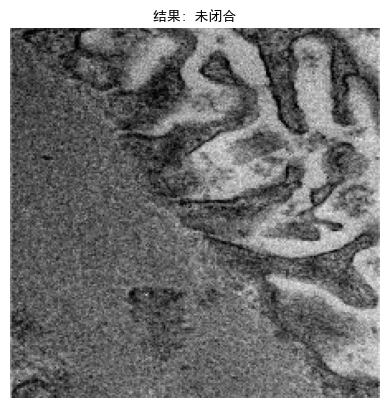

In [37]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
# 从目录中选取一张图片并准备好输入模型进行识别
image_path = 'testdata/unmer9.jpg'
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 进行预测
labels = ['闭合', '异常', '未闭合']
predictions = best_model.predict(x)
res = labels[list(predictions[0]).index(max(predictions[0]))]
my_font = font_manager.FontProperties(fname="./simhei.ttf")
# 显示图片
plt.imshow(img)
plt.title('结果: '+res,fontproperties=my_font )
plt.axis('off')  # 关闭坐标轴
plt.show()